In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.shape

(20640, 10)

In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data.describe()[['median_income','median_house_value']]

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

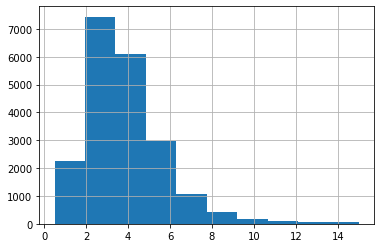

In [7]:
data.median_income.hist()

<AxesSubplot:>

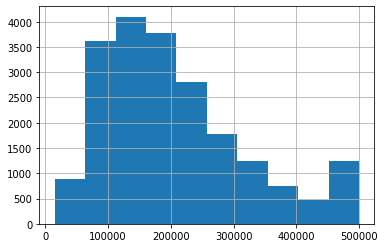

In [8]:
data.median_house_value.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f6b97d5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f6b97dc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f6b962810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0f6b98a310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f6b98a650>],
 'means': []}

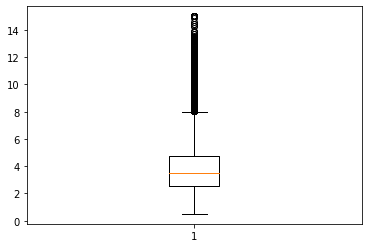

In [9]:
import matplotlib.pyplot as plt
plt.boxplot(data.median_income)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f5965bcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f59664390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f5965bad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0f59664a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f59664d90>],
 'means': []}

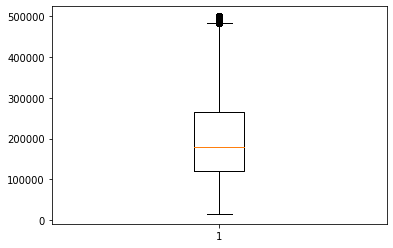

In [10]:
plt.boxplot(data.median_house_value)

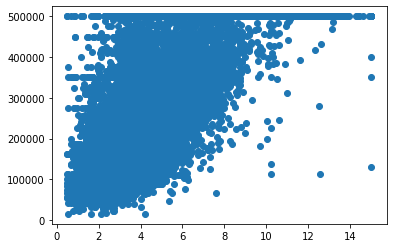

In [11]:
plt.scatter(data.median_income,data.median_house_value)

In [12]:
data.corr()[['median_income','median_house_value']]

,median_income,median_house_value
longitude,-0.015176,-0.045967
latitude,-0.079809,-0.144160
housing_median_age,-0.119034,0.105623
total_rooms,0.198050,0.134153
total_bedrooms,-0.007723,0.049686
population,0.004834,-0.024650
households,0.013033,0.065843
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


In [13]:
#x=data[['median_income','population','housing_median_age']]
x=data[['median_income']]
y=data.median_house_value.values.reshape(-1,1)

In [14]:
x,y

(       median_income
 0             8.3252
 1             8.3014
 2             7.2574
 3             5.6431
 4             3.8462
 ...              ...
 20635         1.5603
 20636         2.5568
 20637         1.7000
 20638         1.8672
 20639         2.3886
 
 [20640 rows x 1 columns],
 array([[452600.],
        [358500.],
        [352100.],
        ...,
        [ 92300.],
        [ 84700.],
        [ 89400.]]))

In [15]:
x.max(),x.min(),y.max(),y.min()

(median_income    15.0001
 dtype: float64,
 median_income    0.4999
 dtype: float64,
 500001.0,
 14999.0)

In [16]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
#print(lm.coef_,lm.intercept_)
lm.fit(x,y)


LinearRegression()

In [17]:
lm.coef_,lm.intercept_

(array([[41793.8492019]]), array([45085.57670327]))

In [18]:
y_pred= lm.intercept_ + lm.coef_*x 

In [19]:
y_pred=lm.predict(x)

In [20]:
print(y)

[[452600.]
 [358500.]
 [352100.]
 ...
 [ 92300.]
 [ 84700.]
 [ 89400.]]


In [21]:
print(y_pred)

[[393027.73007889]
 [392033.03646789]
 [348400.25790111]
 ...
 [116135.12034649]
 [123123.05193305]
 [144914.36490692]]


In [22]:
x.shape

(20640, 1)

In [23]:
np.sum(np.abs(y-y_pred))/x.shape[0]

62625.9337911434

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y,y_pred),np.sqrt(mean_squared_error(y,y_pred))

(62625.9337911434, 83733.57452616918)

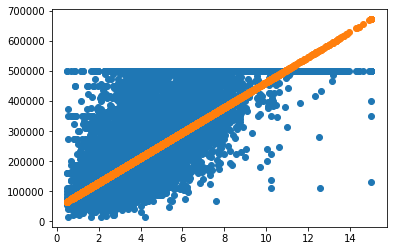

In [25]:
plt.scatter(x,y)
plt.scatter(x,y_pred)

In [26]:
data.median_income.max()

15.0001

In [27]:
a=np.array([1,2,3,4,5])
print(a[[True,False,True,False,True]])

[1 3 5]


In [28]:
data1=data[data.median_income<data.median_income.quantile(0.99)]

In [29]:
data1=data[data.median_income<data.median_income.quantile(0.96)]
data1=data1[data1.median_house_value<data1.median_house_value.quantile(0.92)]

In [30]:
data.shape,data1.shape

((20640, 10), (18227, 10))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f3f96df90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f3f976650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f3f96dc90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0f3f976d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f3f983090>],
 'means': []}

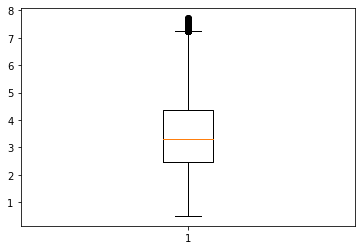

In [31]:
plt.boxplot(data1.median_income)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f3f8f4250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f3f8f48d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f3f8d1590>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0f3f8f4f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f3f904310>],
 'means': []}

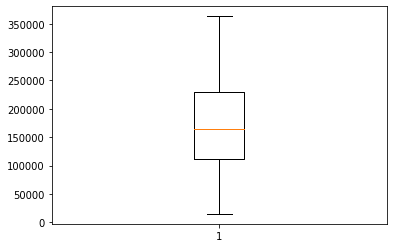

In [32]:
plt.boxplot(data1.median_house_value)

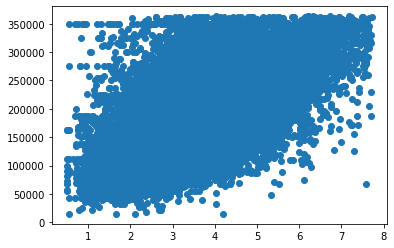

In [33]:
plt.scatter(data1.median_income,data1.median_house_value)

In [34]:
x=data[['median_income','population','housing_median_age']]
y=data.median_house_value.values.reshape(-1,1)

In [35]:
x.max(),x.min(),y.max(),y.min()

(median_income            15.0001
 population            35682.0000
 housing_median_age       52.0000
 dtype: float64,
 median_income         0.4999
 population            3.0000
 housing_median_age    1.0000
 dtype: float64,
 500001.0,
 14999.0)

In [36]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)
y_pred=lm.predict(x)

In [37]:
mean_absolute_error(y,y_pred),np.sqrt(mean_squared_error(y,y_pred))

(60246.12193197326, 80775.27254790647)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,y_train.shape, x_test.shape,y_test.shape


((16512, 3), (16512, 1), (4128, 3), (4128, 1))

In [39]:
x_train.max(),y_train.max(), x_test.max(),y_test.max()

(median_income            15.0001
 population            35682.0000
 housing_median_age       52.0000
 dtype: float64,
 500001.0,
 median_income            15.0001
 population            16122.0000
 housing_median_age       52.0000
 dtype: float64,
 500001.0)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(50,activation='relu',input_dim=3))
model.add(Dense(100,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='relu'))

model.summary()

2022-11-29 15:00:27.356348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 15:00:27.357269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 15:00:27.480021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 15:00:27.480888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 15:00:27.481640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50


2022-11-29 15:00:31.154494: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


516/516 [==============================] - 3s 2ms/step - loss: 33496274944.0000
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 25014226944.0000
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 15288072192.0000
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 13379124224.0000
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 12533272576.0000
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 11496272896.0000
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 10150134784.0000
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 8485282816.0000
Epoch 9/50
516/516 [==============================] - 1s 2ms/step - loss: 7115056128.0000
Epoch 10/50
516/516 [==============================] - 1s 2ms/step - loss: 6760325120.0000
Epoch 11/50
516/516 [==============================] - 1s 2ms/step - loss: 6716032000.0000
Epoch 12/50


In [42]:
y_train_pred=lm.predict(x_train)
mean_absolute_error(y_train,y_train_pred)

60210.81162154681

In [43]:
y_test_pred=lm.predict(x_test)
mean_absolute_error(y_test,y_test_pred)

60387.36317367905

In [44]:
model=Sequential()
model.add(Dense(50,activation='relu',input_dim=3))
model.add(Dense(100,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='relu'))

model.summary()

model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(x_train,y_train,epochs=50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_6 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 151       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
516/516 [==============================] - 1s 1ms/step - loss: nan
Epoch 2/50
516/516 [==============================] - 1s 1ms/step - loss: nan
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/50
516

In [45]:
y_train_pred=lm.predict(x_train)
mean_absolute_error(y_train,y_train_pred)

60210.81162154681

In [46]:
y_test_pred=lm.predict(x_test)
mean_absolute_error(y_test,y_test_pred)

60387.36317367905

In [47]:
model=Sequential()
model.add(Dense(50,activation='relu',input_dim=3))
model.add(Dense(100,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='relu'))

model.summary()

model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(x_train,y_train,epochs=50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_10 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 151       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
516/516 [==============================] - 1s 2ms/step - loss: 32571418624.0000
Epoch 2/50
516/516 [==============================] - 1s 3ms/step - loss: 25726294016.0000
Epoch 3/50
516/516 [==============================] - 1s 2ms/step 

In [48]:
y_train_pred=lm.predict(x_train)
mean_absolute_error(y_train,y_train_pred)

60210.81162154681

In [49]:
y_test_pred=lm.predict(x_test)
mean_absolute_error(y_test,y_test_pred)

60387.36317367905

In [50]:
model.evaluate(x_train,y_train)

516/516 [==============================] - 1s 1ms/step - loss: 6423608832.0000


6423608832.0

In [51]:
model.evaluate(x_test,y_test)

129/129 [==============================] - 0s 1ms/step - loss: 6459202048.0000


6459202048.0

In [52]:
df=pd.DataFrame({'median_income':[6.5683],'population':[758.0],'housing_median_age':[36.0]})
df.shape

(1, 3)

In [53]:
model.predict(df)

array([[351315.2]], dtype=float32)